# Music Synchronization via DTW

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

%matplotlib inline

## Load Audio

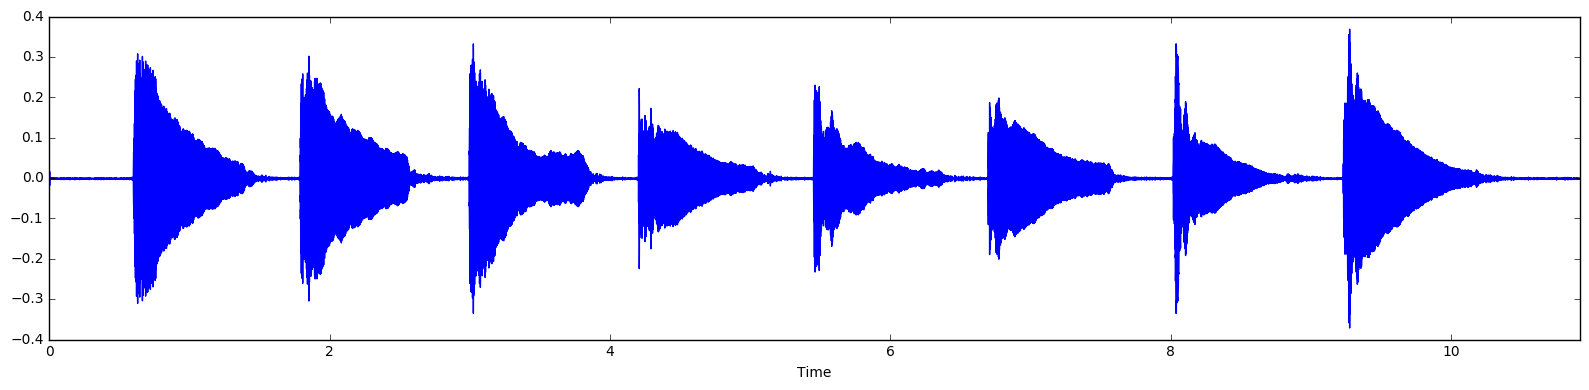

In [2]:
x_1, fs = librosa.load('../data/Scale_Cmajor_Piano.wav')
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x_1, sr=fs)
plt.tight_layout()
plt.show()

In [3]:
display.Audio(data=x_1, rate=fs)

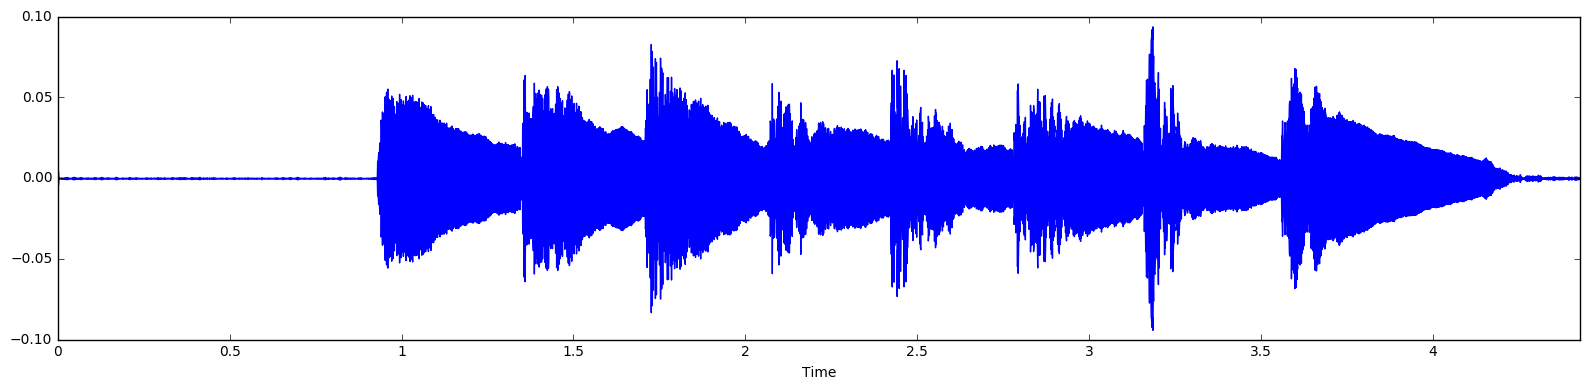

In [4]:
x_2, fs = librosa.load('../data/Systematic_Scale-C-Major_Meinard_middle.wav')
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x_2, sr=fs)
plt.tight_layout()
plt.show()

In [5]:
display.Audio(data=x_2, rate=fs)

## Extract Chroma Features

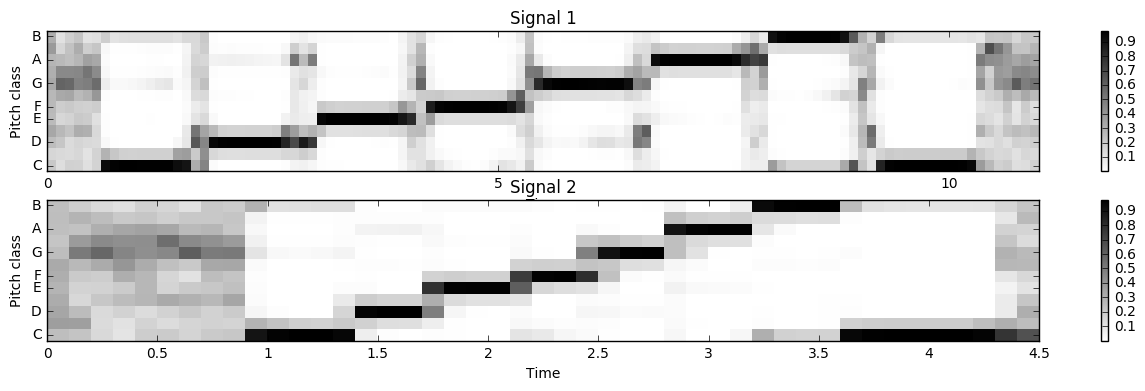

In [6]:
n_fft = 4410
hop_size = 2205

x_1_chroma = librosa.feature.chroma_stft(y=x_1, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)
x_2_chroma = librosa.feature.chroma_stft(y=x_2, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)

plt.figure(figsize=(16, 4))
plt.subplot(2,1,1)
plt.title('Signal 1')
librosa.display.specshow(x_1_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.subplot(2,1,2)
plt.title('Signal 2')
librosa.display.specshow(x_2_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.show()

## Align Chroma Sequences

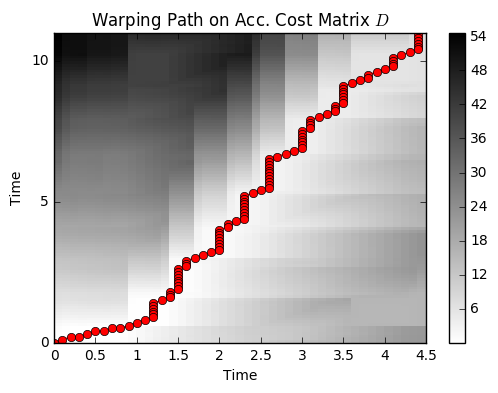

In [7]:
D, wp = librosa.core.dtw(X=x_1_chroma, Y=x_2_chroma, metric='cosine')
wp_s = np.asarray(wp) * hop_size / fs

fig = plt.figure()
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=hop_size)
imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
plt.title('Warping Path on Acc. Cost Matrix $D$')
plt.colorbar()
plt.show()

## Alternative Visualization in Time Domain

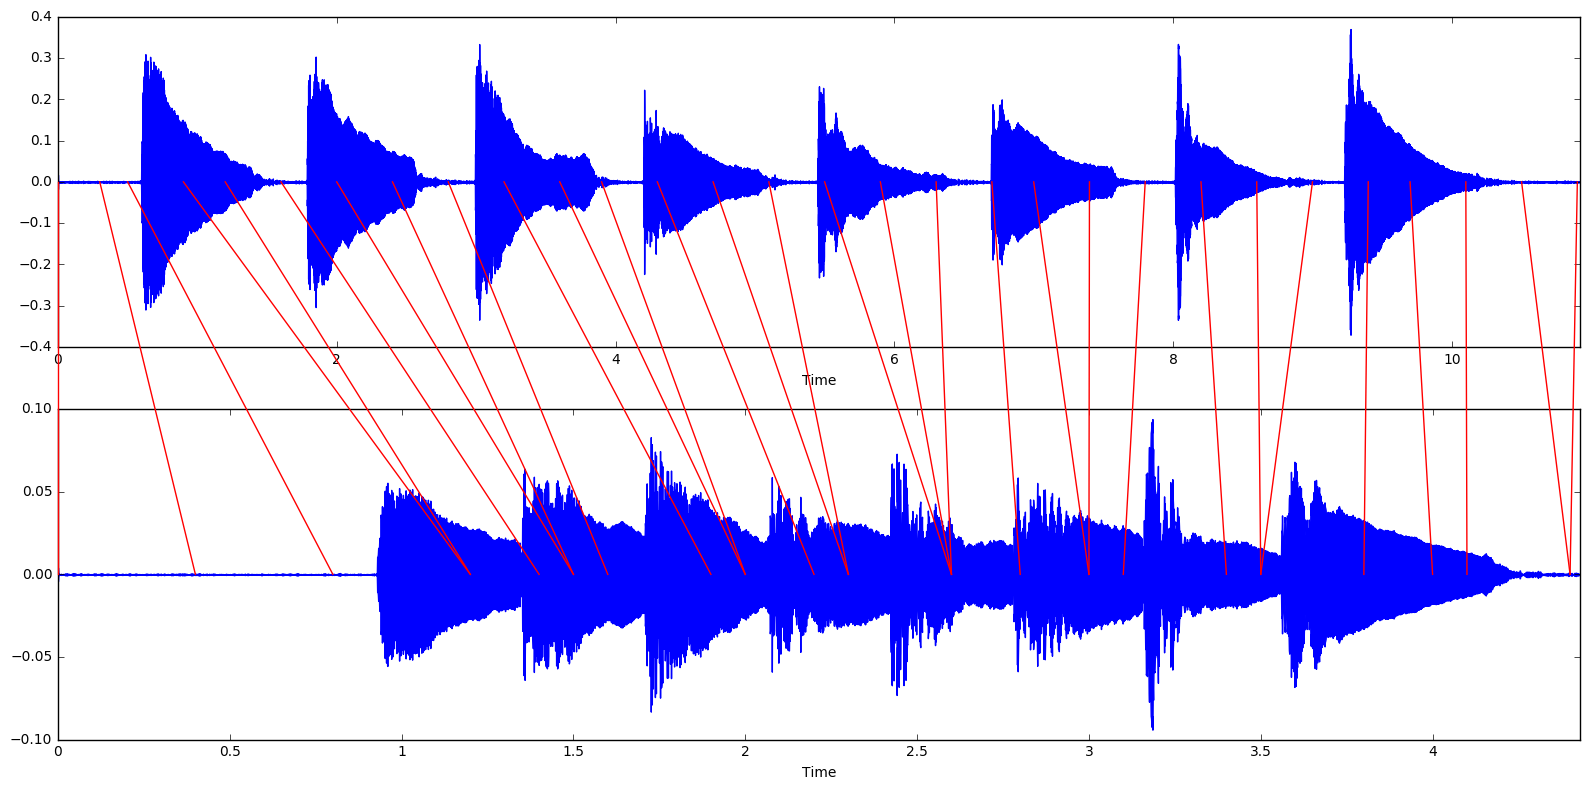

In [8]:
import matplotlib

fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(x_1, sr=fs)
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(x_2, sr=fs)
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idx = np.int16(np.round(np.linspace(0, wp.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_size / fs:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.show()